In [1]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras

from imgaug.augmentables.kps import KeypointsOnImage
from imgaug.augmentables.kps import Keypoint
import imgaug.augmenters as iaa

# Data loading and generation

In [2]:
training_set_annotations = pd.read_csv('training_data/annotations.csv').drop('Unnamed: 0', axis=1).set_index('file_path').fillna(method = 'ffill')
keypoints_names = list(dict.fromkeys(["_".join(index_name.split("_")[:-1]) for index_name in training_set_annotations.columns]))
training_set_annotations.columns

C:\Users\Legion\AppData\Local\Temp\ipykernel_24424\4072160914.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  training_set_annotations = pd.read_csv('training_data/annotations.csv').drop('Unnamed: 0', axis=1).set_index('file_path').fillna(method = 'ffill')


Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [3]:
training_set_annotations.iloc[:5]

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
file_path                                                             
0.jpg               0.687850           0.406274            0.314865   
1.jpg               0.670135           0.364272            0.311972   
2.jpg               0.677678           0.363642            0.321914   
3.jpg               0.679435           0.388143            0.333574   
4.jpg               0.695055           0.412721            0.335883   

           right_eye_center_y  left_eye_inner_corner_x  \
file_path                                                
0.jpg                0.379392                 0.620647   
1.jpg                0.348424                 0.613085   
2.jpg                0.363642                 0.618875   
3.jpg                0.388143                 0.625035   
4.jpg                0.396271                 0.610061   

           left_eye_inner_corner_y  left_eye_outer_corner_x  \
file_path                                                     
0.jpg                     0.412994                 0.761774   
1.jpg                     0.367441                 0.736695   
2.jpg                     0.378343                 0.739421   
3.jpg                     0.407575                 0.753278   
4.jpg                     0.412721                 0.755374   

           left_eye_outer_corner_y  right_eye_inner_corner_x  \
file_path                                                      
0.jpg                     0.416354                  0.378714   
1.jpg                     0.376950                  0.375362   
2.jpg                     0.378343                  0.392480   
3.jpg                     0.399802                  0.391861   
4.jpg                     0.415463                  0.385233   

           right_eye_inner_corner_y  ...  nose_tip_x  nose_tip_y  \
file_path                            ...                           
0.jpg                      0.389473  ...    0.462714    0.594446   
1.jpg                      0.357933  ...    0.502149    0.579801   
2.jpg                      0.378343  ...    0.495388    0.557697   
3.jpg                      0.403689  ...    0.540470    0.564235   
4.jpg                      0.407238  ...    0.451037    0.675933   

           mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
file_path                                                                   
0.jpg                 0.637451             0.833023              0.298068   
1.jpg                 0.587723             0.795333              0.365858   
2.jpg                 0.633572             0.760566              0.351316   
3.jpg                 0.683322             0.757330              0.387974   
4.jpg                 0.631994             0.807534              0.324914   

           mouth_right_corner_y  mouth_center_top_lip_x  \
file_path                                                 
0.jpg                  0.806135                0.451173   
1.jpg                  0.792163                0.486298   
2.jpg                  0.757625                0.492447   
3.jpg                  0.772870                0.523991   
4.jpg                  0.802055                0.468362   

           mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
file_path                                                      
0.jpg                    0.759744                   0.449278   
1.jpg                    0.731943                   0.473624   
2.jpg                    0.731164                   0.492447   
3.jpg                    0.730122                   0.537096   
4.jpg                    0.767785                   0.460699   

           mouth_center_bottom_lip_y  
file_path                             
0.jpg                       0.880060  
1.jpg                       0.890418  
2.jpg                       0.819368  
3.jpg                       0.815296  
4.jpg                       0.904908  

[5 rows x 30 columns]

In [3]:
training_set_annotations.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

# Data augmentations

In [176]:
INPUT_SIZE = (96, 96, 1)

train_aug = iaa.Sequential(
    [
        iaa.Resize(INPUT_SIZE[:2], interpolation="linear"),
        iaa.Fliplr(0.1),
        iaa.Sometimes(0.05, iaa.Affine(rotate=(-30, 30), scale=(0.5, 2))),
        iaa.Sometimes(0.05, iaa.Affine(translate_percent={"x": (-0.4, 0.4), "y": (-0.4, 0.4)}))
    ]
)

test_aug = iaa.Sequential([iaa.Resize(INPUT_SIZE[:2], interpolation="linear")])

In [146]:
def model_output_to_keypoints_coordinates(output: np.array) -> dict:
    ret = {}
    for i, keypoint_name in enumerate(keypoints_names):
        keypoint_coordinates = output[0][(i*2):(2*i+2)]
        ret[keypoint_name] = keypoint_coordinates
    return ret

In [147]:
class DataGenerator(keras.utils.Sequence):
    def __init__(
        self,
        df: pd.DataFrame,
        images_path: str,
        batch_size: int,
        shuffle: bool = True,
        keys: list = None,
        aug: iaa.Augmenter = None,
        yield_3d: bool = False,
        yield_absolute_coords: bool = False,
        yield_normalized_images: bool = False
    ):
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = [i for i in df.index]
        if keys is not None:
            self.indexes = [i for i in keys]
        self.datalen = len(self.indexes)
        self.images_path = images_path
        self.aug = aug
        self.input_size = INPUT_SIZE
        self.yield_absolute_coords = yield_absolute_coords
        self.df = df
        self.yield_normalized_images = yield_normalized_images
        if yield_3d:
            self.input_size = INPUT_SIZE[:2] + (3,)
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def _load_image(self, path: str) -> np.array:
        return cv2.cvtColor(
            cv2.imread(self.images_path + "/" + path), cv2.COLOR_BGR2GRAY
        )[:, :, np.newaxis].astype(np.float32)

    def _data_generation(self, indices):
        keypoints_ret = self.df.loc[indices].to_numpy()
        images = np.array([self._load_image(path) for path in indices])
        # Data augmentation
        if self.aug is not None:
            images_tmp = np.empty((self.batch_size,) + self.input_size)
            keypoints_tmp = np.empty((self.batch_size,)+(len(keypoints_names)*2,))
            for i, (image, keypoints_img) in enumerate(zip(images, keypoints_ret)):
                kps = []
                for _, keyp in model_output_to_keypoints_coordinates([keypoints_img]).items():
                    kps.append(Keypoint(x = keyp[0] * image.shape[1], y = keyp[1] * image.shape[0]))
                kps_obj = KeypointsOnImage(kps, shape=image.shape)
                augmented_img, augmented_kps = self.aug(image = image, keypoints = kps_obj)
                images_tmp[i] = augmented_img
                if self.yield_normalized_images:
                    images_tmp[i] /= 255
                keypoints_tmp = []
                for keypoint in augmented_kps:
                    if not self.yield_absolute_coords:
                        keypoints_tmp.append(keypoint.x / INPUT_SIZE[1])
                        keypoints_tmp.append(keypoint.y / INPUT_SIZE[0])
                    else:
                        keypoints_tmp.append(keypoint.x)
                        keypoints_tmp.append(keypoint.y)
                keypoints_ret[i] = np.array(keypoints_tmp)
                images = images_tmp.copy()
        return images, keypoints_ret

    def __getitem__(self, index):
        # get batch indexes from shuffled indexes
        batch_indexes = self.indexes[
            index * self.batch_size : (index + 1) * self.batch_size
        ]
        return self._data_generation(batch_indexes)

    def __len__(self):
        # Denotes the number of batches per epoch
        return self.datalen // self.batch_size

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)


gen = DataGenerator(training_set_annotations, "training_data", 32, aug = train_aug, yield_3d=False)

print(len(gen))

220


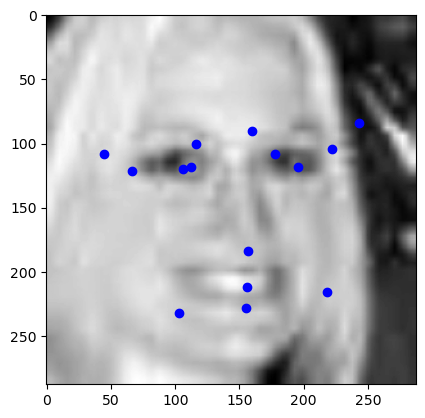

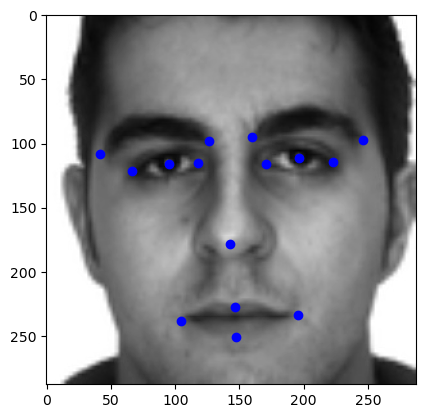

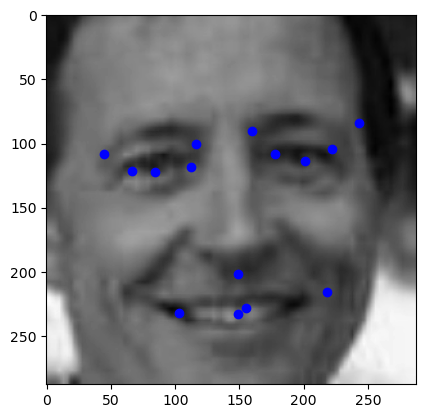

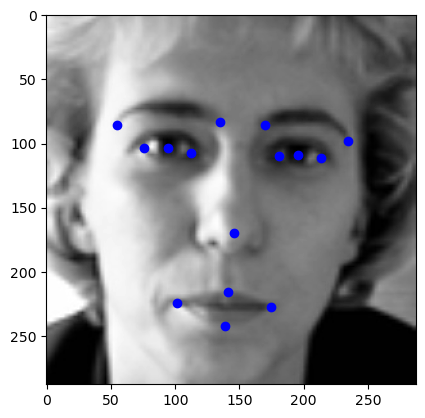

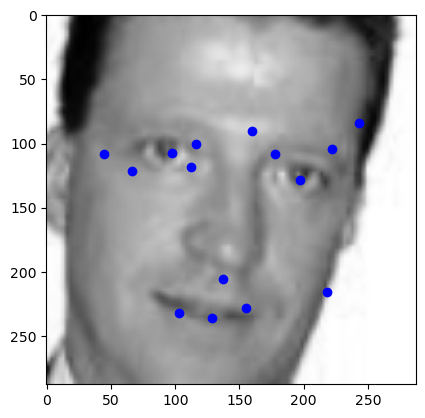

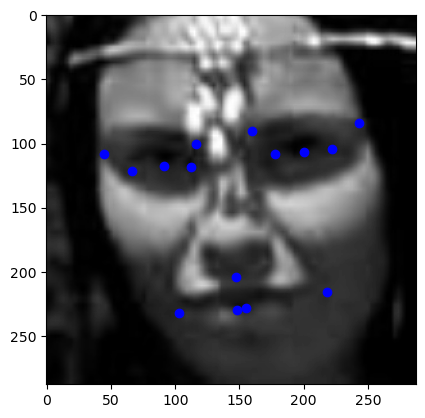

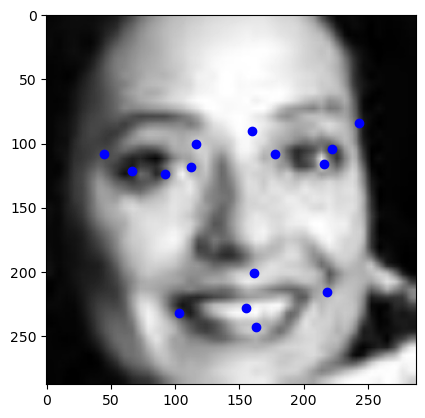

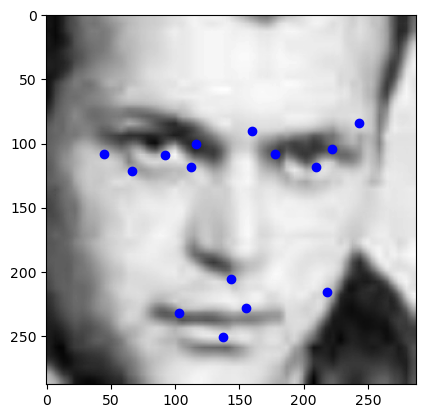

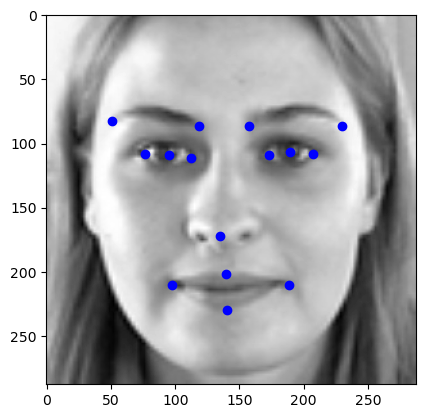

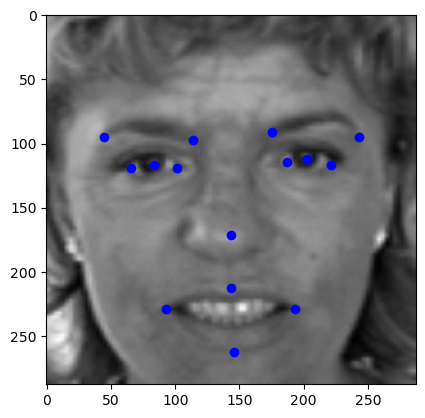

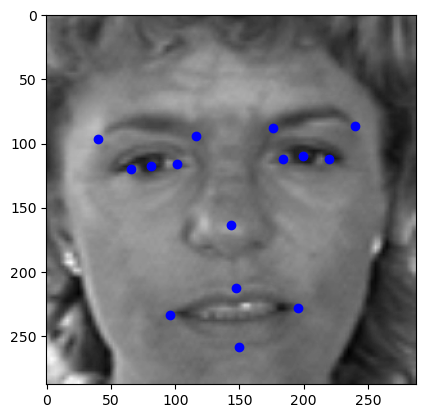

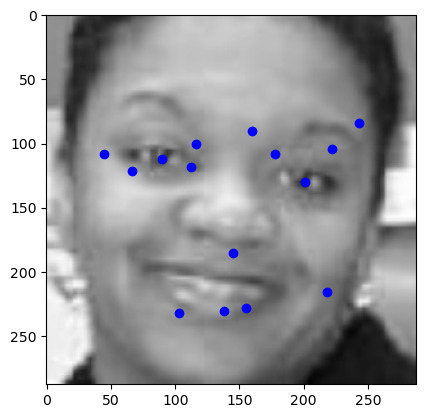

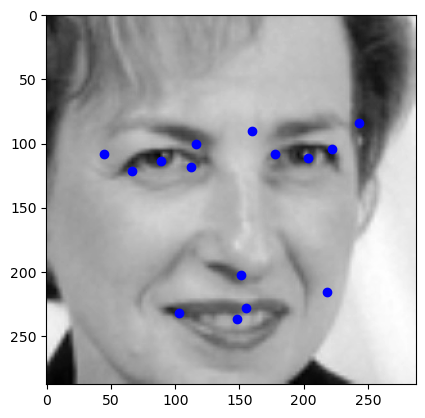

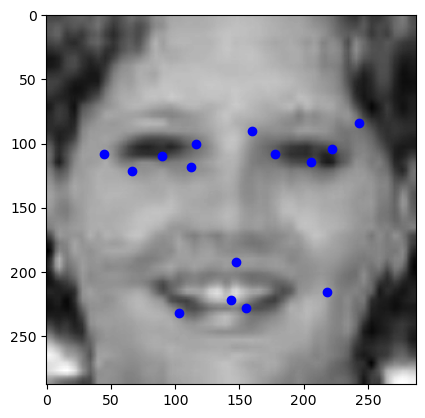

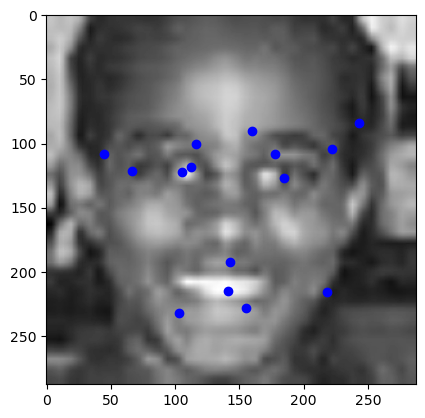

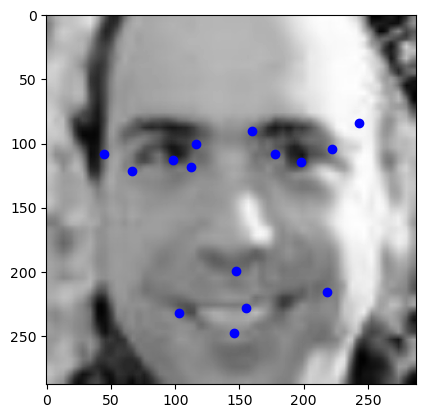

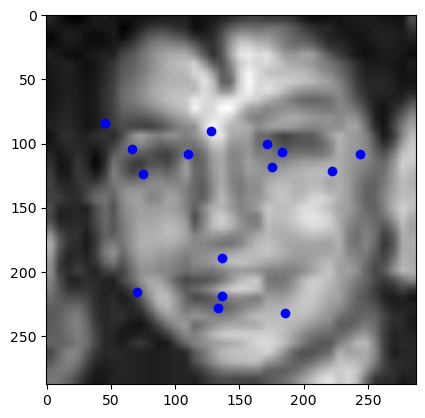

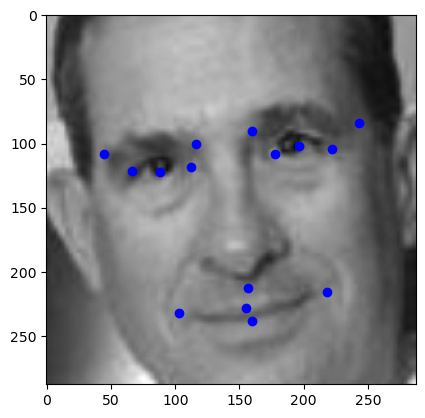

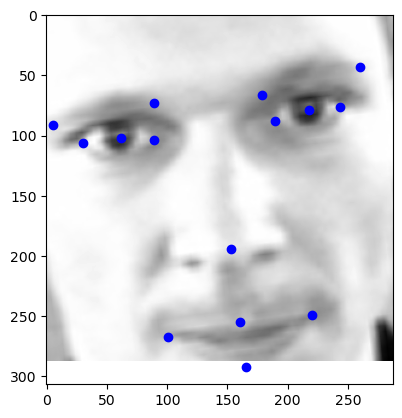

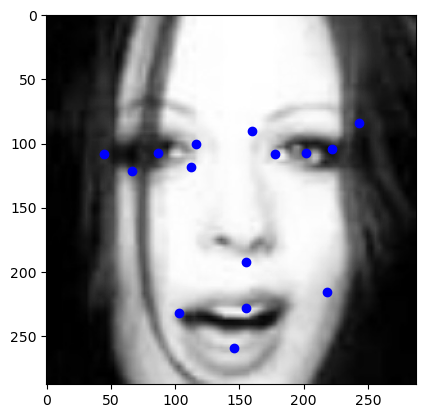

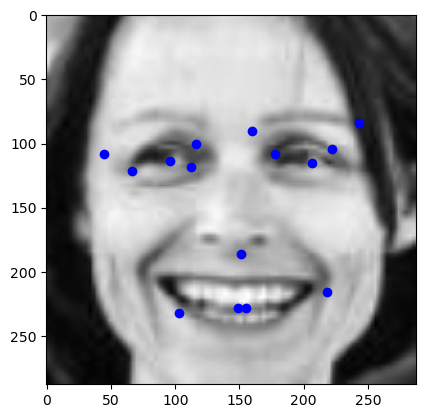

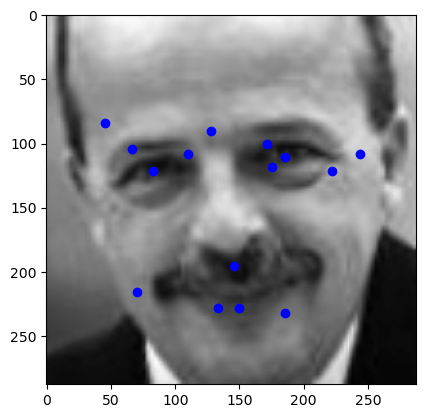

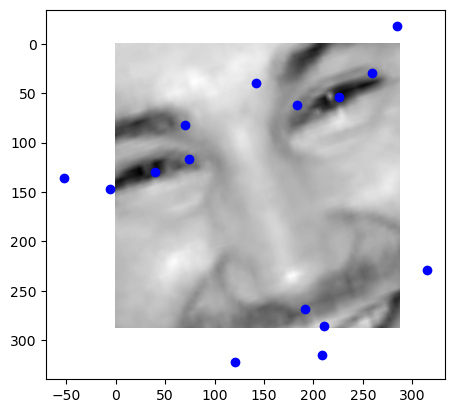

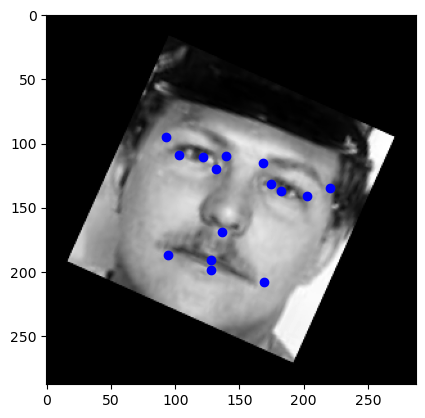

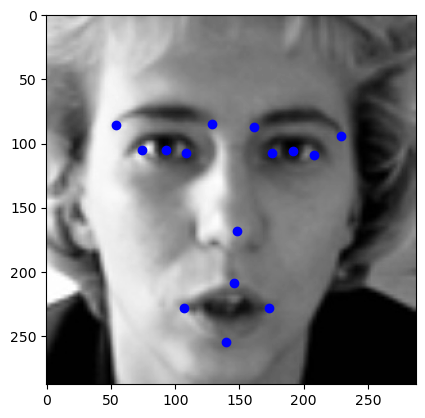

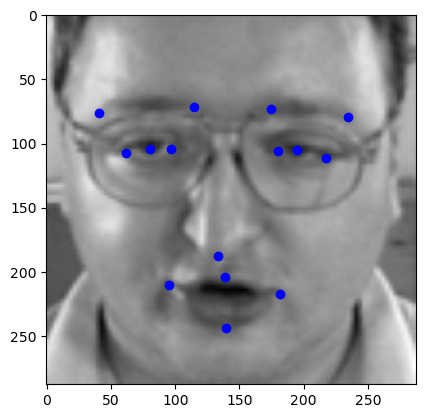

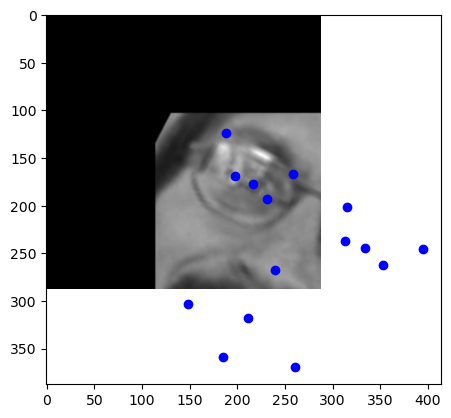

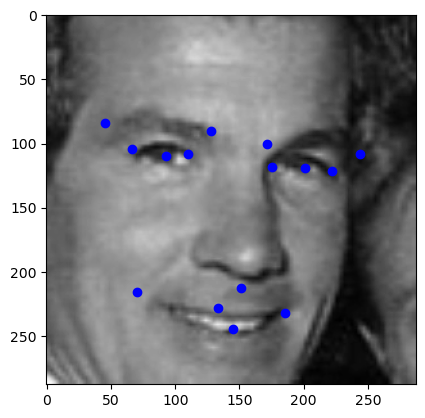

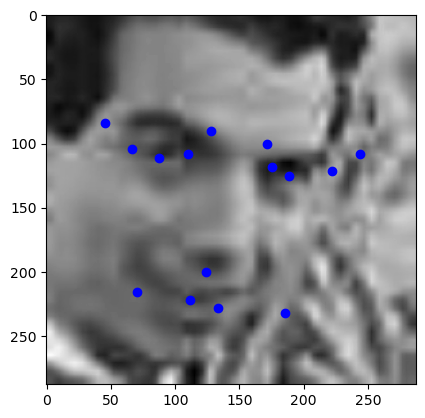

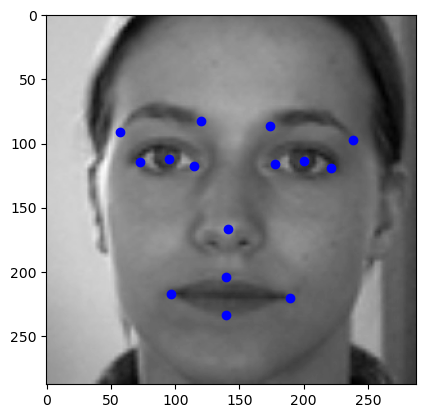

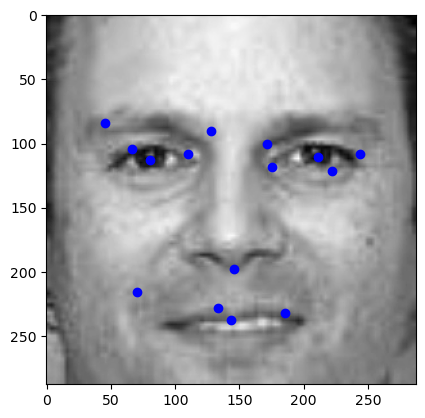

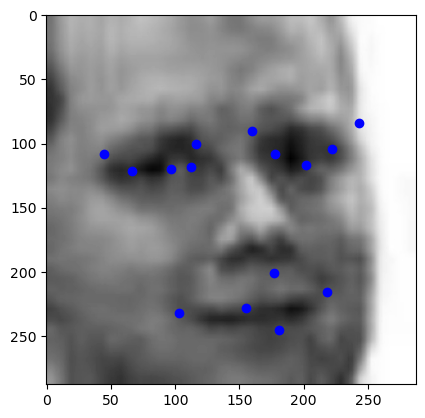

In [130]:
def display_image_with_keypoints(img: np.array, keypoints: list, keypoints_relative: bool = True):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    keyps_reshaped = keypoints.reshape(-1, 2)
    if keypoints_relative:
        ax.scatter(keyps_reshaped[:,0] * img.shape[1], keyps_reshaped[:,1] * img.shape[0], color='blue')
    else:
        ax.scatter(keyps_reshaped[:,0], keyps_reshaped[:,1], color='blue')
    plt.show()
    
imgs, keyps = gen[0]
for i in range(32):
    display_image_with_keypoints(imgs[i], keyps[i])

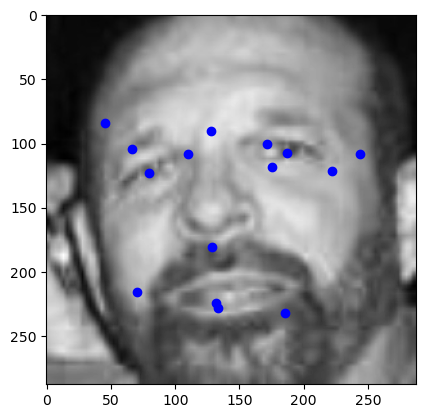

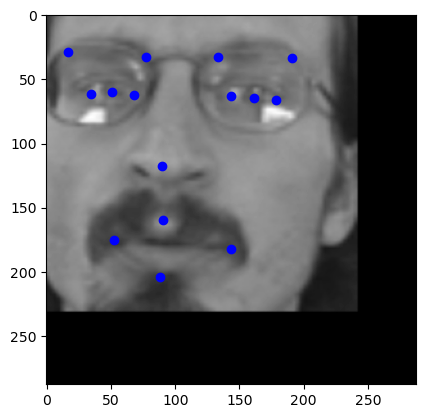

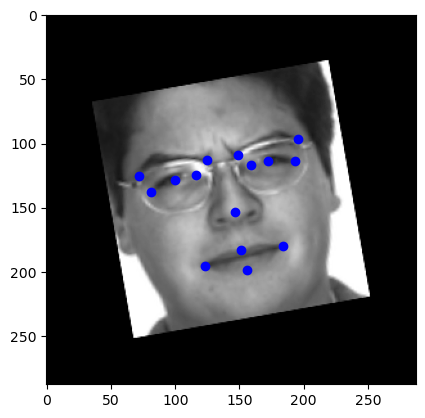

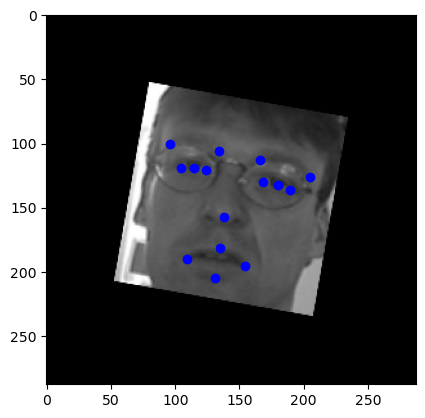

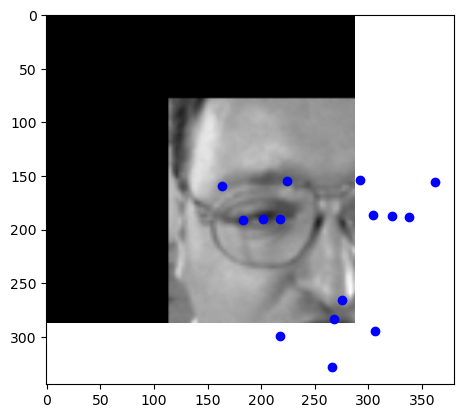

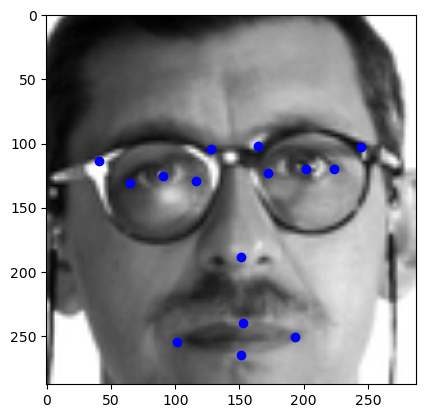

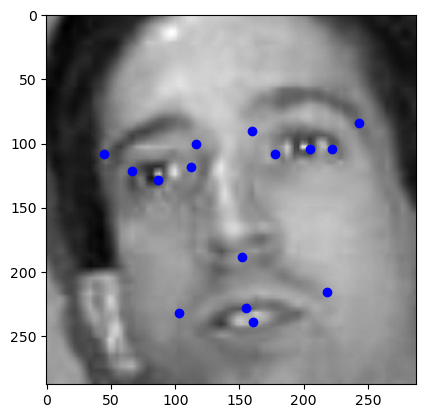

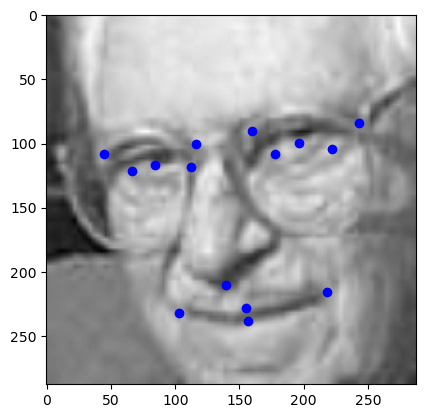

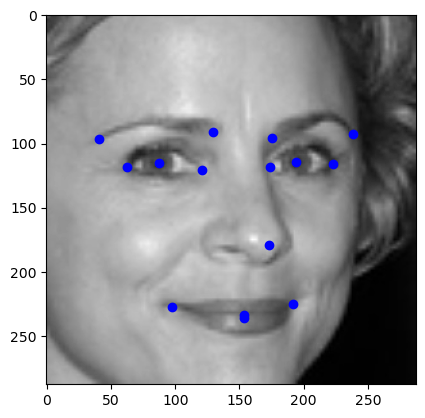

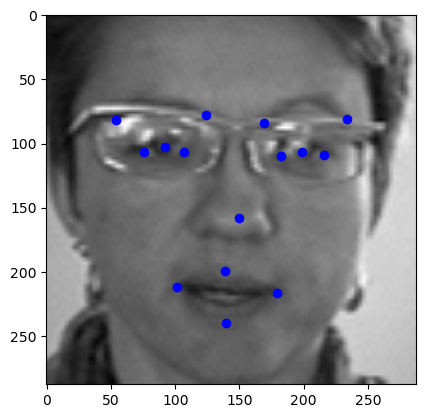

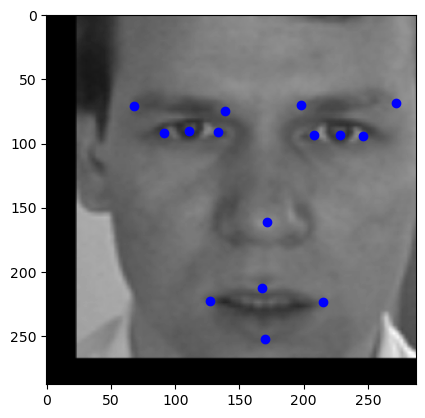

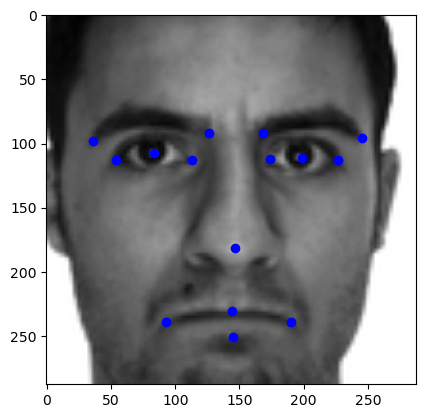

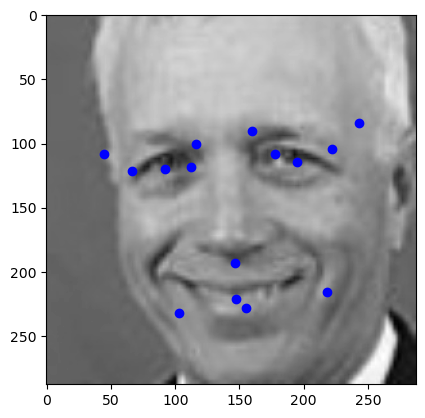

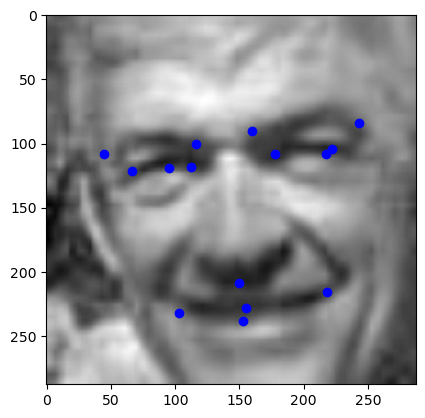

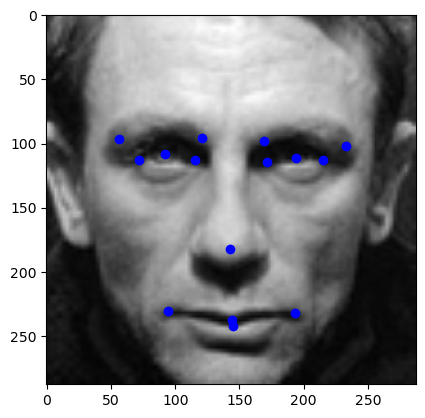

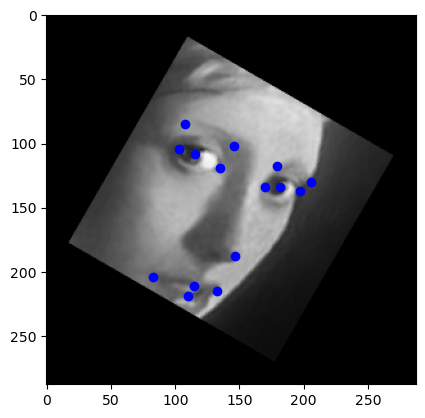

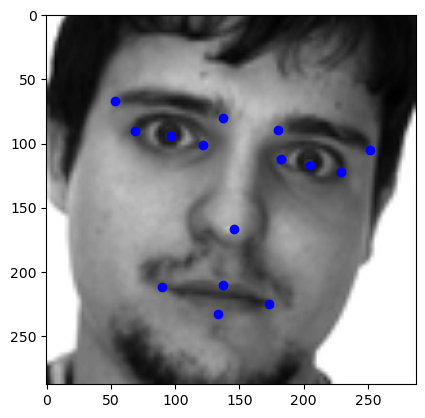

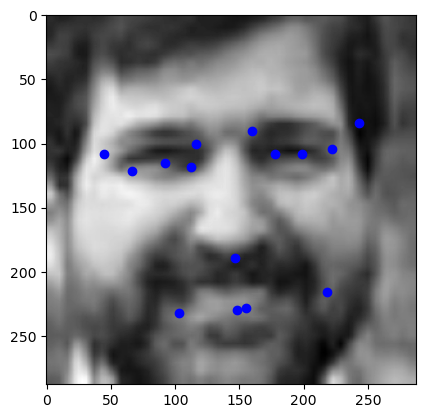

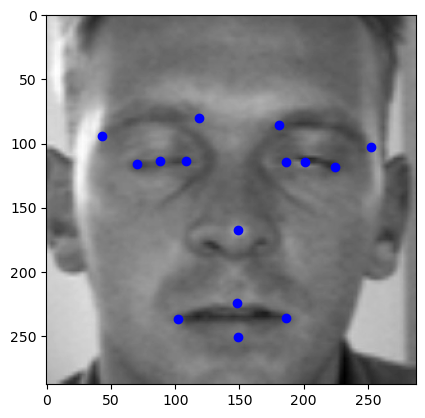

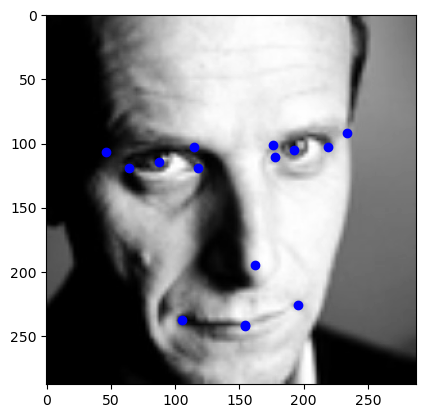

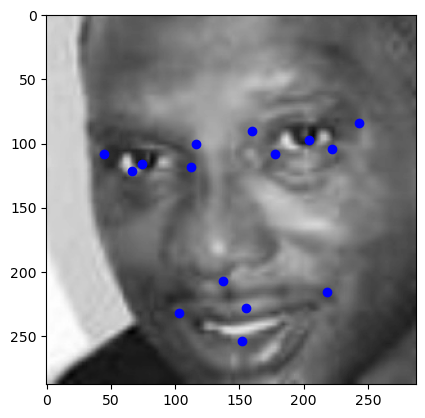

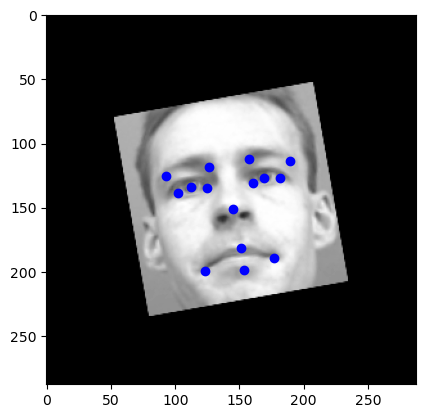

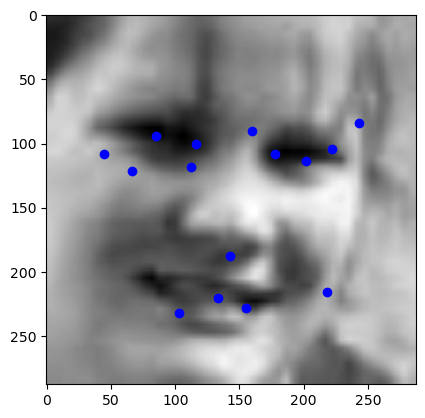

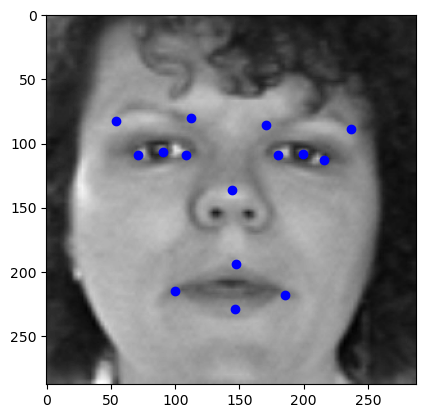

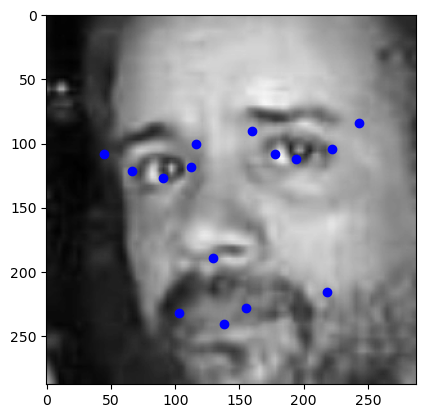

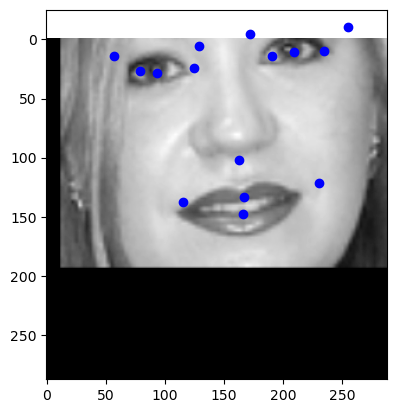

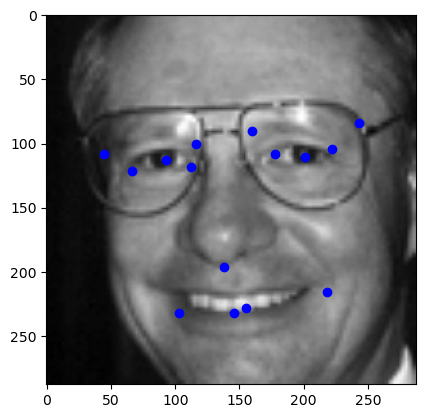

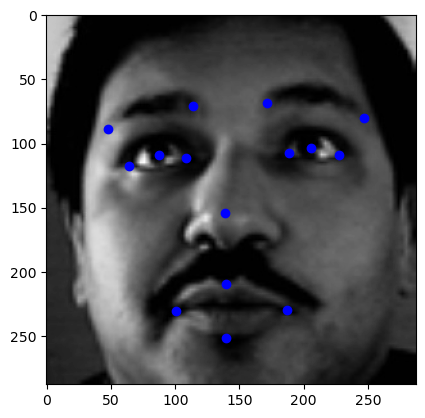

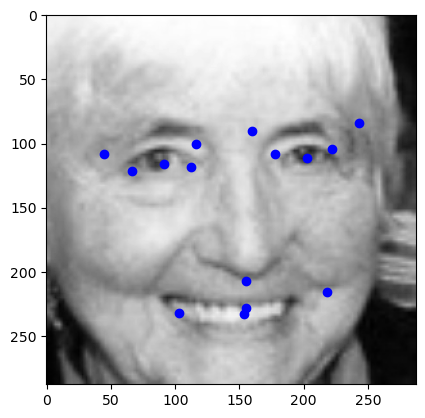

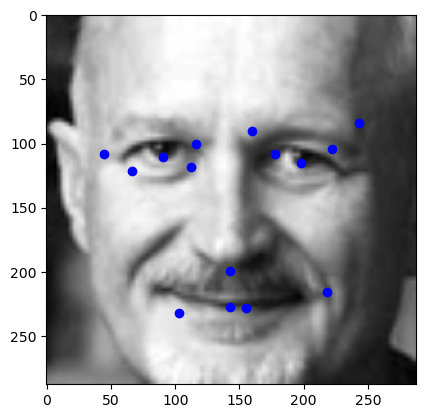

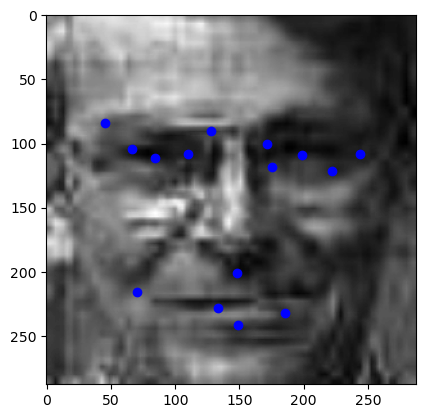

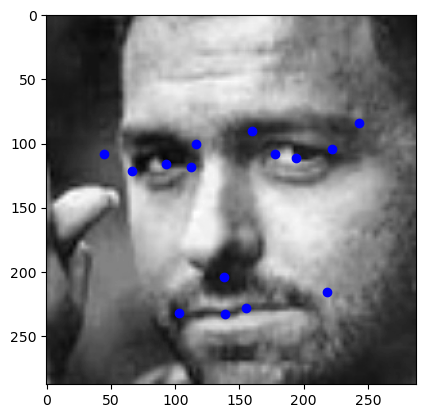

In [86]:
gen = DataGenerator(training_set_annotations, "training_data", 32, aug = train_aug, yield_3d=False, yield_absolute_coords=True)

imgs, keyps = gen[0]
for i in range(32):
    display_image_with_keypoints(imgs[i], keyps[i], False)

# Model training

In [8]:
BATCH_SIZE = 16
EPOCHS = 5

In [188]:
from sklearn.model_selection import train_test_split

train_val_keys, test_keys = train_test_split(training_set_annotations.index, test_size = 0.2)
train_keys, val_keys = train_test_split(train_val_keys, test_size=0.1)
training_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys=train_keys, aug = train_aug)
validation_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys=val_keys, aug = test_aug)

test_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys = test_keys, aug = test_aug)

# Model 2

In [203]:
import keras
from keras import layers

def getModel2():
    model2 = keras.models.Sequential()

    pretrained_model = keras.applications.MobileNetV2(
        input_shape=INPUT_SIZE[:2] + (3,),
        alpha=1.0,
        include_top=False,
        weights="imagenet",
        input_tensor=None,
        pooling=None,
    )
    pretrained_model.trainable = True

    model2.add(layers.Convolution2D(3, (1, 1), padding='same', input_shape=INPUT_SIZE))
    model2.add(layers.LeakyReLU(alpha = 0.1))
    model2.add(layers.Lambda(keras.applications.mobilenet.preprocess_input))
    model2.add(pretrained_model)
    model2.add(layers.Dropout(0.3))
    model2.add(layers.GlobalAveragePooling2D())
    model2.add(layers.Dense(30, activation='relu'))
    model2.summary()
    return model2
getModel2()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_157 (Conv2D)         (None, 96, 96, 3)         6         
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 96, 96, 3)         0         
                                                                 
 lambda_9 (Lambda)           (None, 96, 96, 3)         0         
                                                                 
 mobilenetv2_1.00_96 (Funct  (None, 3, 3, 1280)        2257984   
 ional)                                                          
                                                                 
 dropout_125 (Dropout)       (None, 3, 3, 1280)        0         
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                           

# Model 3

In [193]:
from keras.layers import MaxPool2D

def getModel3():
    model3 = keras.models.Sequential()

    model3.add(layers.Convolution2D(16, (3, 3), input_shape = INPUT_SIZE, activation = 'linear'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.MaxPool2D())
    model3.add(layers.Dropout(0.3))

    model3.add(layers.Convolution2D(32, (3, 3)))
    model3.add(layers.BatchNormalization())
    model3.add(MaxPool2D())
    model3.add(layers.Dropout(0.3))


    model3.add(layers.Convolution2D(64, (3, 3)))
    model3.add(layers.BatchNormalization())
    model3.add(MaxPool2D())
    model3.add(layers.Dropout(0.3))

    model3.add(layers.Convolution2D(128, (3, 3)))
    model3.add(layers.BatchNormalization())
    model3.add(MaxPool2D())
    model3.add(layers.Dropout(0.3))

    model3.add(layers.Flatten())
    model3.add(layers.Dense(30, activation='relu'))
    model3.summary()
    return model3

getModel3()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_142 (Conv2D)         (None, 94, 94, 16)        160       
                                                                 
 batch_normalization_135 (B  (None, 94, 94, 16)        64        
 atchNormalization)                                              
                                                                 
 max_pooling2d_134 (MaxPool  (None, 47, 47, 16)        0         
 ing2D)                                                          
                                                                 
 dropout_113 (Dropout)       (None, 47, 47, 16)        0         
                                                                 
 conv2d_143 (Conv2D)         (None, 45, 45, 32)        4640      
                                                                 
 batch_normalization_136 (B  (None, 45, 45, 32)      

# Model 4

In [204]:
import keras
from keras import layers

def getModel4():
    model4 = keras.models.Sequential()

    pretrained_model = keras.applications.MobileNetV2(
        input_shape=INPUT_SIZE[:2] + (3,),
        alpha=1.0,
        include_top=False,
        weights="imagenet",
        input_tensor=None,
        pooling=None,
        classifier_activation='linear'
    )
    pretrained_model.trainable = False

    model4.add(layers.Convolution2D(3, (1, 1), padding='same', input_shape=INPUT_SIZE))
    model4.add(layers.LeakyReLU(alpha = 0.1))
    model4.add(layers.Lambda(keras.applications.mobilenet.preprocess_input))
    model4.add(pretrained_model)
   
    model4.add(layers.Flatten())
    model4.add(layers.Dropout(0.3))
    model4.add(layers.Dense(30, activation='relu'))
    model4.summary()
    return model4
getModel4()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_158 (Conv2D)         (None, 96, 96, 3)         6         
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 96, 96, 3)         0         
                                                                 
 lambda_10 (Lambda)          (None, 96, 96, 3)         0         
                                                                 
 mobilenetv2_1.00_96 (Funct  (None, 3, 3, 1280)        2257984   
 ional)                                                          
                                                                 
 flatten_32 (Flatten)        (None, 11520)             0         
                                                                 
 dropout_126 (Dropout)       (None, 11520)             0         
                                                     

In [191]:
def compile_and_train(
    model: keras.Model,
    optimizer: keras.optimizers.Optimizer,
    loss: keras.losses.Loss,
    training_set: DataGenerator,
    validation_set: DataGenerator,
    model_name: str = "model",
    epochs = EPOCHS
) -> keras.Model:
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
        filepath=f"checkpoint_{model_name}_{optimizer._name}_{loss.__name__}.keras",
        monitor="val_loss",
        mode="min",
        save_best_only=True,
    )
    model_early_callback = keras.callbacks.EarlyStopping(
        monitor = "val_loss",
        patience=20,
        restore_best_weights = True
    )
    LR_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=10, factor=.5, min_lr=.0000001)
    print(optimizer._name, loss.__name__)
    model.compile(optimizer=optimizer, loss=loss, metrics = [keras.metrics.MeanSquaredError(), keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()])
    history = model.fit(
        training_set,
        epochs=epochs,
        validation_data=validation_set,
        callbacks=[model_checkpoint_callback, model_early_callback, LR_callback]
    )
    model.save(f"{model_name}_{optimizer._name}_{loss.__name__}.keras")
    return model, history

In [16]:
optimizers_to_check = [
    keras.optimizers.legacy.Adam(),
    keras.optimizers.legacy.RMSprop(),
    keras.optimizers.legacy.SGD()
]

losses_to_check = [
    keras.losses.mean_squared_error,
    keras.losses.mean_absolute_error,
    keras.losses.mean_absolute_percentage_error
]

In [118]:
import pickle

res_metrics = {}
BATCH_SIZE = 16
training_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys=train_keys, aug = train_aug, yield_absolute_coords=True, yield_normalized_images=False)
validation_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys=val_keys, aug = test_aug, yield_absolute_coords=True, yield_normalized_images=False)

test_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys = test_keys, aug = test_aug, yield_absolute_coords=True, yield_normalized_images=False)

for optimizer in optimizers_to_check:
    for loss in losses_to_check:
        file_name = f"model2_{optimizer._name}_{loss.__name__}.keras"
        if not os.path.exists(file_name):
            _, history = compile_and_train(getModel2(), optimizer, loss, training_set, validation_set, "model2", epochs=50)
            res_metrics[file_name] = history

with open('model2_history.pickle', 'wb') as f:
    pickle.dump(res_metrics, f)

Adam mean_squared_error
Epoch 1/50
317/317 [==============================] - 90s 265ms/step - loss: 108.8328 - mean_squared_error: 108.8328 - root_mean_squared_error: 10.4323 - mean_absolute_error: 5.8686 - val_loss: 183.5896 - val_mean_squared_error: 183.5896 - val_root_mean_squared_error: 13.5495 - val_mean_absolute_error: 10.9978 - lr: 0.0010
Epoch 2/50
317/317 [==============================] - 74s 232ms/step - loss: 91.0426 - mean_squared_error: 91.0426 - root_mean_squared_error: 9.5416 - mean_absolute_error: 5.1933 - val_loss: 719.8786 - val_mean_squared_error: 719.8786 - val_root_mean_squared_error: 26.8306 - val_mean_absolute_error: 22.6795 - lr: 0.0010
Epoch 3/50
317/317 [==============================] - 70s 222ms/step - loss: 84.7989 - mean_squared_error: 84.7989 - root_mean_squared_error: 9.2086 - mean_absolute_error: 4.9242 - val_loss: 534.4474 - val_mean_squared_error: 534.4474 - val_root_mean_squared_error: 23.1181 - val_mean_absolute_error: 20.6021 - lr: 0.0010
Epoch 4

KeyboardInterrupt: 

In [195]:
import pickle

res_metrics = {}
training_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys=train_keys, aug = train_aug, yield_absolute_coords=True, yield_normalized_images=False)
validation_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys=val_keys, aug = test_aug, yield_absolute_coords=True, yield_normalized_images=False)

test_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys = test_keys, aug = test_aug, yield_absolute_coords=True, yield_normalized_images=False)


file_name = f"model3_adam_mse.keras"
model, history = compile_and_train(getModel3(), keras.optimizers.legacy.Adam(learning_rate=0.001), keras.losses.mean_squared_error, training_set, validation_set, "model3", epochs=150)
res_metrics[file_name] = history
print(model.evaluate(test_set))

with open('model3_history.pickle', 'wb') as f:
    pickle.dump(res_metrics, f)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_146 (Conv2D)         (None, 94, 94, 16)        160       
                                                                 
 batch_normalization_139 (B  (None, 94, 94, 16)        64        
 atchNormalization)                                              
                                                                 
 max_pooling2d_138 (MaxPool  (None, 47, 47, 16)        0         
 ing2D)                                                          
                                                                 
 dropout_117 (Dropout)       (None, 47, 47, 16)        0         
                                                                 
 conv2d_147 (Conv2D)         (None, 45, 45, 32)        4640      
                                                                 
 batch_normalization_140 (B  (None, 45, 45, 32)      

NameError: name 'pickle' is not defined

1/1 [==============================] - 0s 46ms/step


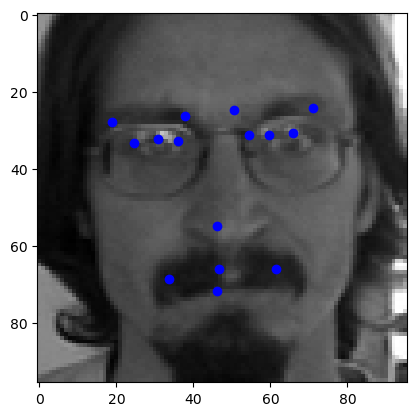

In [198]:
img = test_set[0][0][1]
pred = model.predict(np.array([img]))
display_image_with_keypoints(img, pred, False)

In [206]:
res_metrics = {}
training_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys=train_keys, aug = train_aug, yield_absolute_coords=True)
validation_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys=val_keys, aug = test_aug, yield_absolute_coords=True)

test_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys = test_keys, aug = test_aug, yield_absolute_coords=True)

file_name = f"model4_{optimizer._name}_{loss.__name__}.keras"
model, history = compile_and_train(getModel4(), keras.optimizers.legacy.Adam(), keras.losses.mean_squared_error, training_set, validation_set, "model4", epochs=50)
res_metrics[file_name] = history
print(model.evaluate(test_set))
with open('model4_history.pickle', 'wb') as f:
    pickle.dump(res_metrics, f)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_160 (Conv2D)         (None, 96, 96, 3)         6         
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 96, 96, 3)         0         
                                                                 
 lambda_12 (Lambda)          (None, 96, 96, 3)         0         
                                                                 
 mobilenetv2_1.00_96 (Funct  (None, 3, 3, 1280)        2257984   
 ional)                                                          
                                                                 
 flatten_34 (Flatten)        (None, 11520)             0         
                                                                 
 dropout_128 (Dropout)       (None, 11520)             0         
                                                     

1/1 [==============================] - 0s 62ms/step


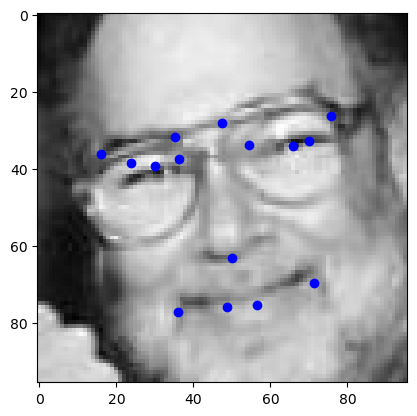

In [209]:
img = test_set[0][0][6]
pred = model.predict(np.array([img]))
display_image_with_keypoints(img, pred, False)

In [136]:
def load_model_from_weights(path: str) -> keras.Model:
    return keras.models.load_model(path)

# Filters

In [53]:
keypoints_names

['left_eye_center',
 'right_eye_center',
 'left_eye_inner_corner',
 'left_eye_outer_corner',
 'right_eye_inner_corner',
 'right_eye_outer_corner',
 'left_eyebrow_inner_end',
 'left_eyebrow_outer_end',
 'right_eyebrow_inner_end',
 'right_eyebrow_outer_end',
 'nose_tip',
 'mouth_left_corner',
 'mouth_right_corner',
 'mouth_center_top_lip',
 'mouth_center_bottom_lip']

left_eye_center


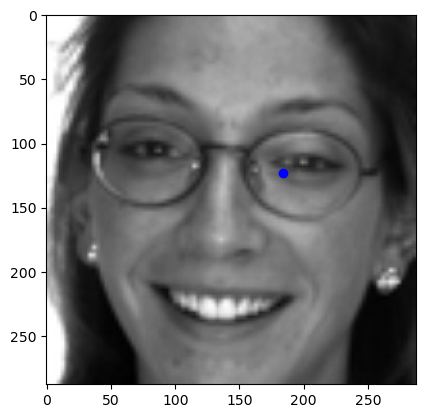

right_eye_center


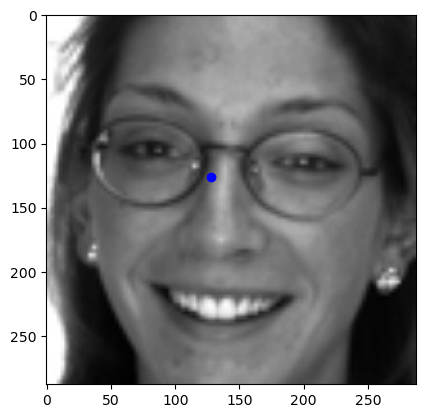

left_eye_inner_corner


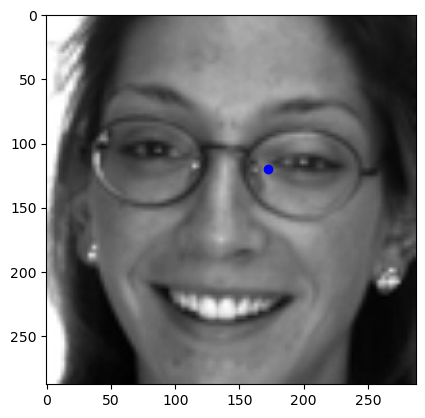

left_eye_outer_corner


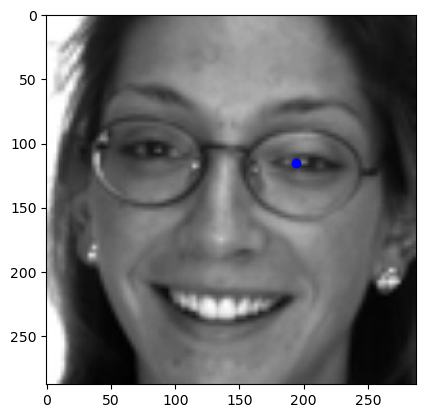

right_eye_inner_corner


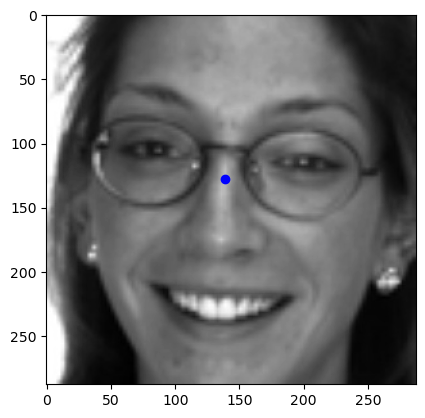

right_eye_outer_corner


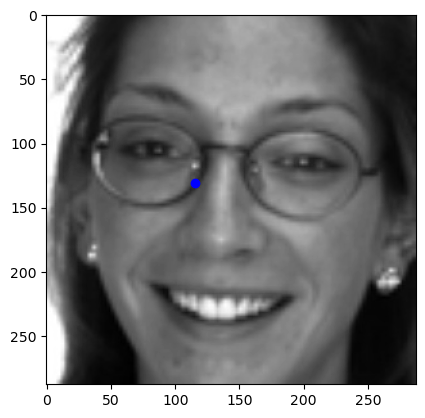

left_eyebrow_inner_end


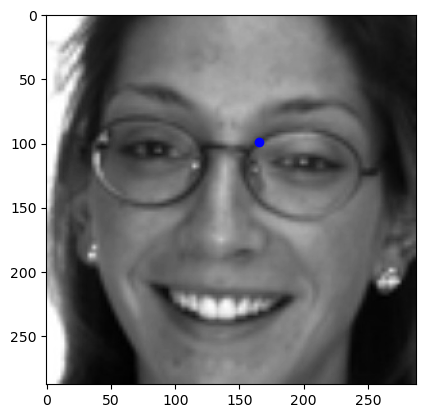

left_eyebrow_outer_end


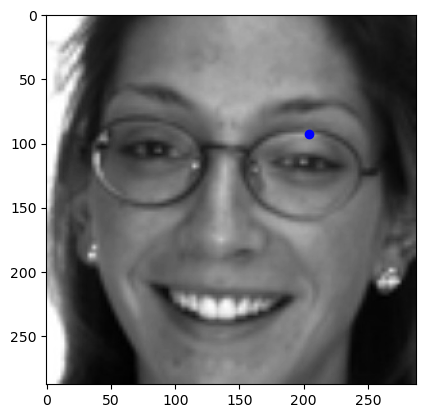

right_eyebrow_inner_end


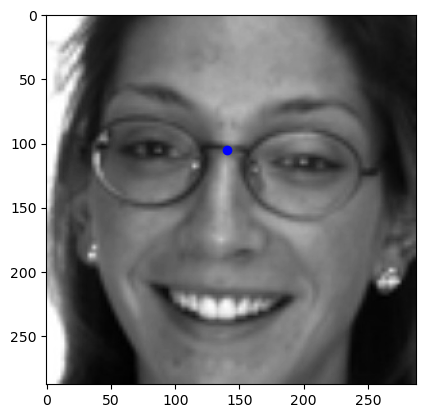

right_eyebrow_outer_end


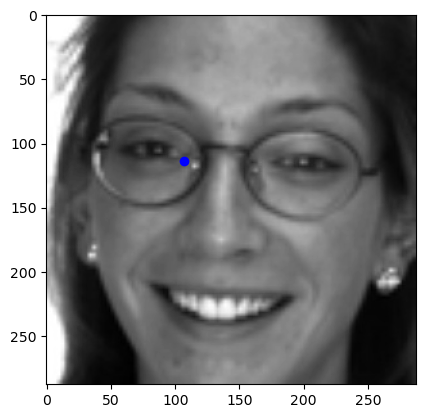

nose_tip


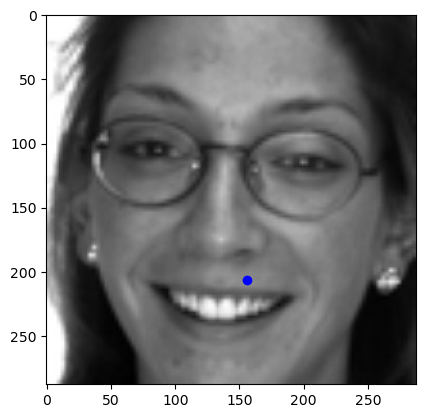

mouth_left_corner


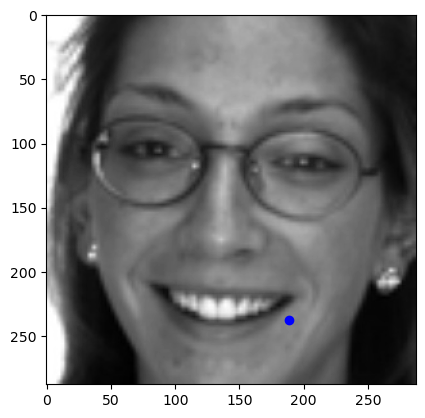

mouth_right_corner


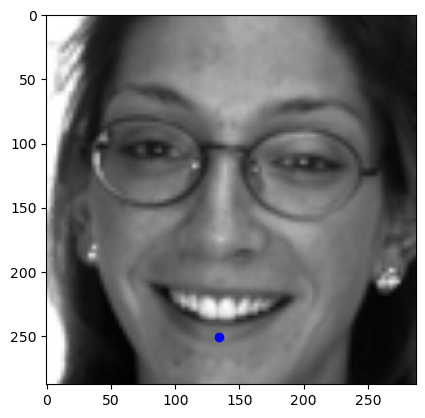

mouth_center_top_lip


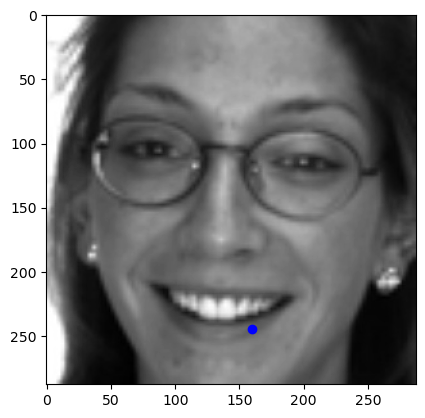

mouth_center_bottom_lip


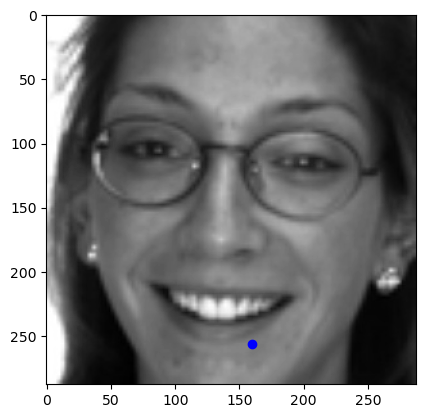

In [49]:
keyps = model_output_to_keypoints_coordinates(res)
for key_name in keypoints_names:
    print(key_name)
    display_image_with_keypoints(img, keyps[key_name], False)

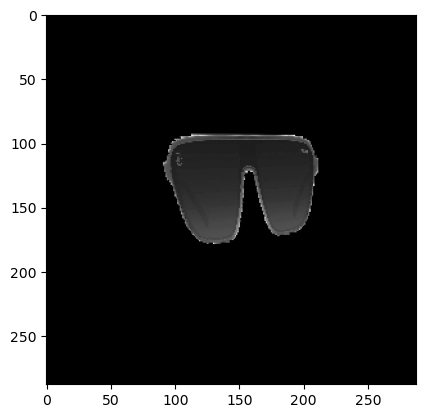

In [51]:
import json

class Filter:
    def __init__(self, json_descr_path: str):
        with open(json_descr_path, 'r') as f:
            data = json.load(f)
            self.image = cv2.imread(f"filters/{data['file_path']}")
            self.ref_points = data['reference_points']
    def show_image(self):
        plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))
    def warp_to_points(self, points: dict) -> np.array:
        dst = []
        src = []
        for keypoint_name in self.ref_points:
            if keypoint_name in points:
                dst.append(points[keypoint_name])
                src.append(self.ref_points[keypoint_name])
        assert len(dst) == len(src) == 4
        src = np.array(src, dtype=np.float32)
        dst = np.array(dst, dtype=np.float32)
        matrix = cv2.getPerspectiveTransform(src, dst)
        return cv2.warpPerspective(self.image, matrix, (INPUT_SIZE[0], INPUT_SIZE[1]), cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

glasses = Filter('filters/sunglasses.json')
glasses_warped = cv2.cvtColor(glasses.warp_to_points(keyps), cv2.COLOR_BGR2GRAY)
plt.imshow(glasses_warped, cmap='gray')

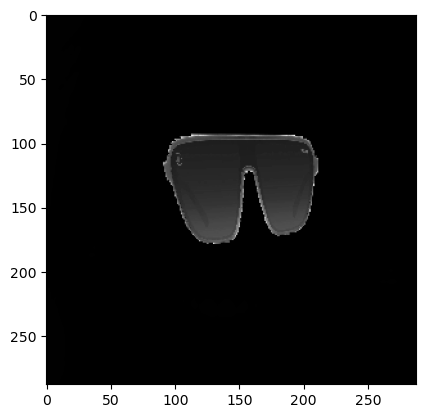

In [52]:
def combine_image_and_filter(img: np.array, filter: np.array) -> np.array:
    pseudo_alpha_filter = (filter > 0).astype(np.uint8)
    inverse_pseudo_alpha_filter = np.ones(INPUT_SIZE[:2]) - pseudo_alpha_filter
    return filter * pseudo_alpha_filter + inverse_pseudo_alpha_filter * img.squeeze()

plt.imshow(combine_image_and_filter(img, glasses_warped), cmap = 'gray')